# IA: Busca de Doadores Compat√≠veis de Sangue em Hemocentros


## Bibliotecas utilizadas

In [12]:
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

from helper_functions import Graph, BancoDeHemocentros

## Preparando o problema

### Gerando um grafo da cidade
Vamos come√ßar gerando o grafo da cidade em que nosso sistema vai rodar. No caso, escolhemos a cidade de S√£o Carlos. Com a biblioteca `osmnx`, conseguimos gerar esse grafo e salv√°-lo em um arquivo `.graphml`. Essa biblioteca √© especializada em redes urbanas, utilizando dados geoespaciais reais para gerar um grafo de uma determinada regi√£o.

A classe `Graph` definida em `helper_functions.py` abstrai algumas funcionalidades que iremos precisar mais adiante. Para utilizar  

In [13]:
# # Nome da cidade
# cidade = "S√£o Carlos, S√£o Paulo, Brasil"

# # Baixa o grafo das ruas para transporte por carro (modo drive)
# G = ox.graph_from_place(cidade, network_type='drive')
# ox.save_graphml(G, filepath="sao_carlos.graphml")

N√∫mero de n√≥s: 9042
N√∫mero de arestas: 22340


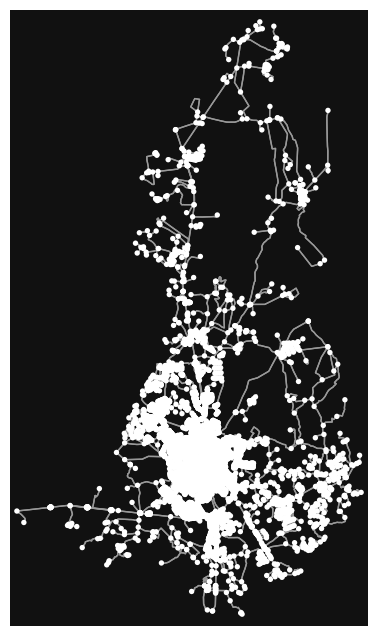

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
# INSTANCIANDO A CLASSE GRAPH CRIADA
G = Graph("sao_carlos.graphml")

# Mostra informa√ß√µes do grafo
print(f"N√∫mero de n√≥s: {len(G.graph.nodes)}")
print(f"N√∫mero de arestas: {len(G.graph.edges)}")

# Desenha o grafo
ox.plot_graph(G.graph)

Essa √© a carinha do nosso grafo. Para visualiz√°-lo melhor, vamos colocar essa rede em cima do mapa real de S√£o Carlos.

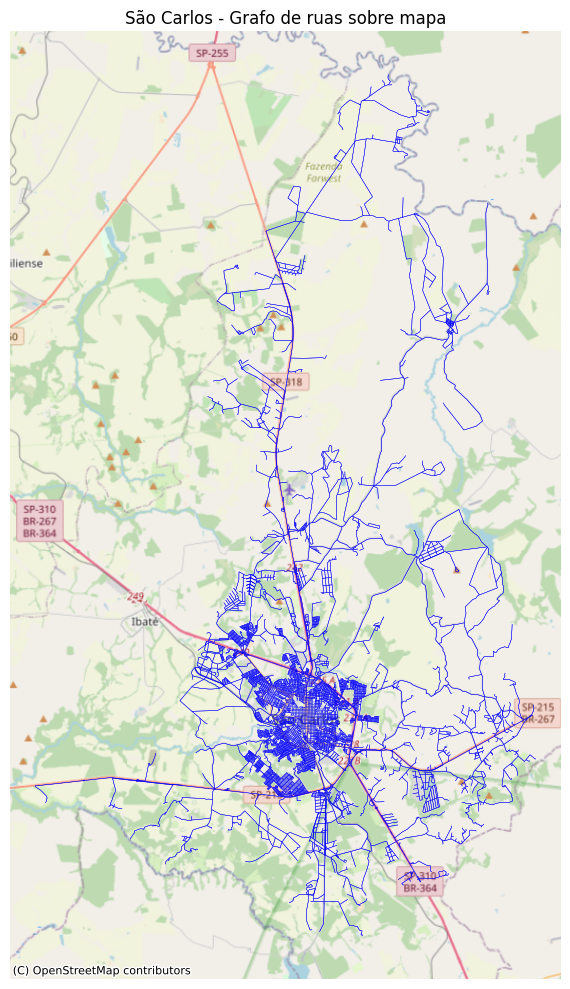

In [15]:
# Plotando as ruas de S√£o Carlos sobre o mapa da cidade
edges = G.edges_gdf

fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.3, edgecolor="blue")
ctx.add_basemap(ax, crs=edges.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

plt.title("S√£o Carlos - Grafo de ruas sobre mapa")
plt.tight_layout()

plt.savefig("images/sao_carlos_mapa.png", dpi=300)

plt.show()

### Definindo os Hemocentros
Agora que j√° possu√≠mos o grafo da cidade toda de S√£o Carlos, devemos definir onde ficar√£o os `Hemocentros`, que s√£o os n√≥s de interesse do nosso problema de busca (n√≥s finais). Para isso, vamos pegar 7 n√≥s aleat√≥rios, e defini-los como Hemocentros. Na classe j√° existe um m√©todo implementado que retorna n n√≥s aleat√≥rios do grafo, o m√©todo `get_random_nodes()`.

Cada n√≥ do grafo √© salvo com um ID, isto √©, uma String que o identifica. Escolhendo 7 IDs aleat√≥rios, vamos plotar sobre o mapa de S√£o Carlos para visualiz√°-los.

In [16]:
# Pegando 7 n√≥s aleat√≥rios para representar os hemocentros
hemocentros = G.get_random_nodes(7)
print(hemocentros)

# Converte os hemocentros para GDF (somente para poder plotar)
gdf_hemocentros = G.get_gdf_nodes(hemocentros)

[5025460995, 984238842, 2775292476, 1029786632, 1120084990, 6804132740, 1013705698]


Vamos semelhantemente ao caso anterior plotar os hemocentros sobre o mapa de S√£o Carlos, a fim de obter uma melhor visualiza√ß√£o dos nossos dados. Os c√≠rculos vermelhos no mapa representar√£o a localiza√ß√£o dos hemocentros.

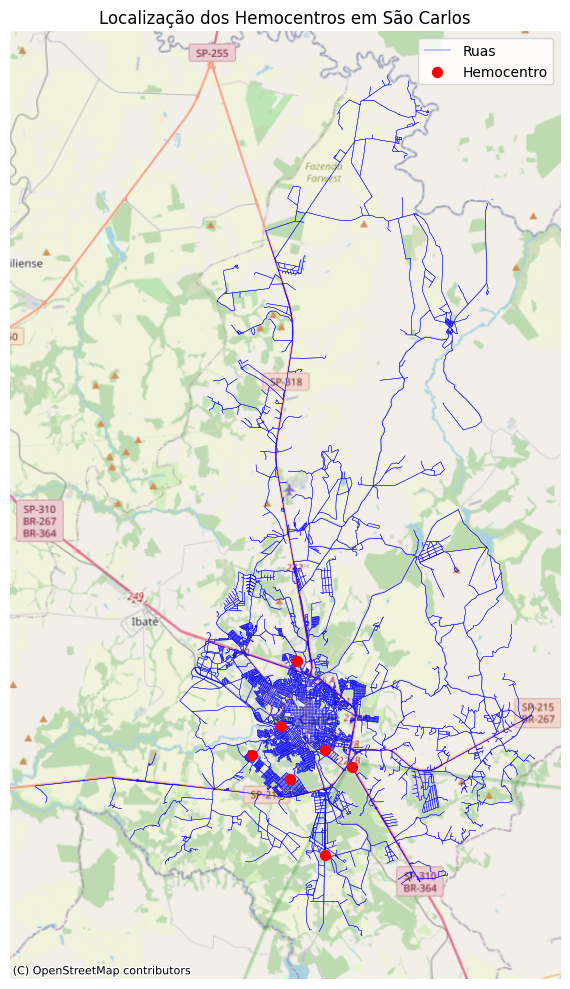

In [17]:
# Plotando o mapa
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.3, edgecolor="blue", label='Ruas')
gdf_hemocentros.plot(ax=ax, color="red", markersize=50, zorder=3, label='Hemocentro')

ctx.add_basemap(ax, crs=edges.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

plt.legend()
plt.title("Localiza√ß√£o dos Hemocentros em S√£o Carlos")
plt.tight_layout()

plt.savefig("images/hemocentros.png", dpi=300)

plt.show()

Precisamos ainda definir o estoque de determinado tipo sangu√≠neo em cada um dos hemocentros. Para isso, vamos usar uma outra classe definida em `helper_functions.py`, a classe `Hemocentros`. Essa classe abstrai todo o estoque de bolsas de sangue de todos os hemocentros da cidade de S√£o Carlos (ou de qualquer cidade que utilize o sistema).

In [18]:
H = BancoDeHemocentros(hemocentros, G.graph)

# Exemplo, estoque de bolsas de sangue um hemocentro
H.consultar_estoque(hemocentros[0])

{'A+': 0, 'A-': 0, 'B+': 0, 'B-': 0, 'AB+': 12, 'AB-': 0, 'O+': 0, 'O-': 0}

### Localiza√ß√£o do Usu√°rio
Agora, que temos os hemocentros dipostos aleatoriamente, precisamos definir a localiza√ß√£o do n√≥ inicial, ou seja, da localiza√ß√£o atual do usu√°rio do sistema. Vamos tamb√©m gerar uma localiza√ß√£o aleat√≥ria para representar o ponto de partida do grafo.

In [19]:
user = G.get_random_nodes(1)
gdf_user = G.get_gdf_nodes(user)

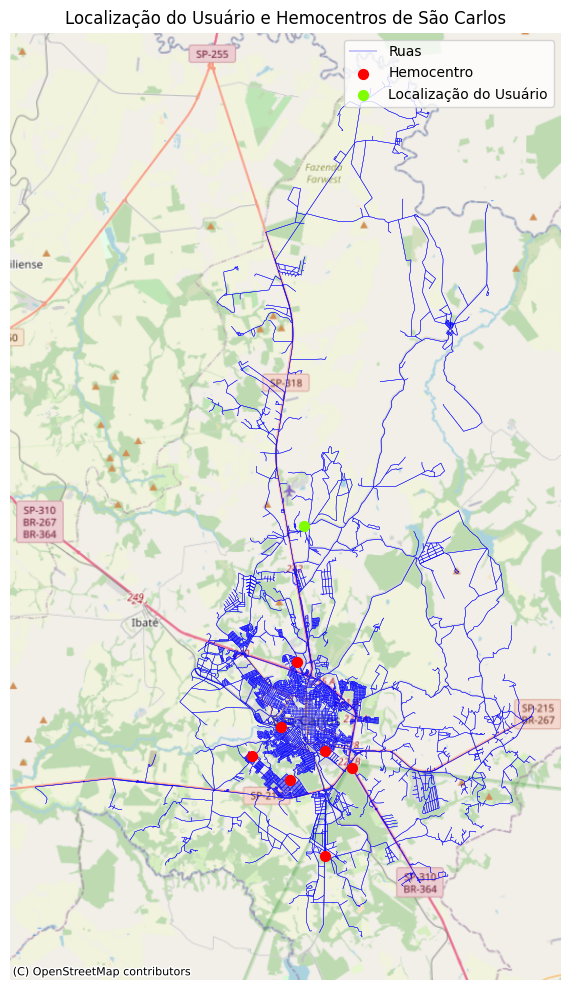

In [20]:
# Plotando o mapa com a localiza√ß√£o aleat√≥ria
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.3, edgecolor="blue", label='Ruas')
gdf_hemocentros.plot(ax=ax, color="red", markersize=50, zorder=3, label='Hemocentro')
gdf_user.plot(ax=ax, color="chartreuse", markersize=50, zorder=3, label='Localiza√ß√£o do Usu√°rio')

ctx.add_basemap(ax, crs=edges.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

plt.legend()
plt.title("Localiza√ß√£o do Usu√°rio e Hemocentros de S√£o Carlos")
plt.tight_layout()

plt.savefig("images/usuario.png", dpi=300)

plt.show()

## Buscas: BFS e A*
As duas buscas implementadas para solucionar o problema s√£o a Busca em Largura (ou Breadth-First Search) e o algoritmo A* (A-Estrela). 

Antes de implementar as buscas, o sistema deve ser capaz de identificar atrav√©s do banco de dados quais hemocentros possuem os tipos sangu√≠neos doadores compat√≠veis com o do usu√°rio. Assim, deve-se filtrar os hemocentros que n√£o atendem √†s necessidades antes de realizar a busca.

In [21]:
# Definindo o tipo de sangue do usu√°rio e filtrando os HCs v√°lidos
blood_type = "O-"
hcs_validos = H.hemocentros_validos(blood_type)

print(hcs_validos)

[984238842, 1029786632, 1120084990, 6804132740]


Estes IDs acima s√£o os n√≥s dos hemocentros v√°lidos, isto √©, aqueles que possuem estoque de sangue compat√≠vel com o usu√°rio para realizar a doa√ß√£o. Vamos usar os algoritmos de busca em grafos para encontrarmos a melhor rota entre o usu√°rio e o destino final, mas antes vamos plotar os hemocentros para termos uma melhor visualiza√ß√£o do problema. 

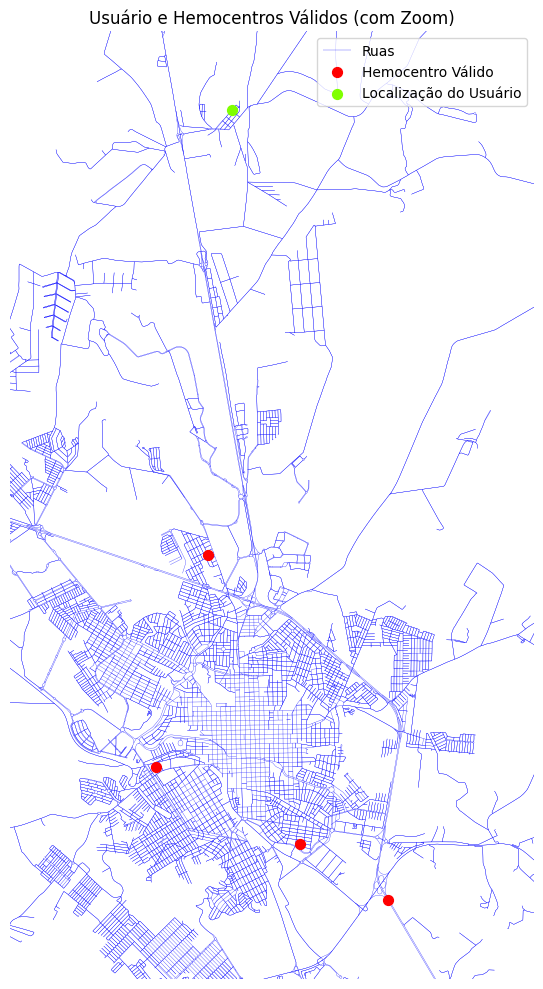

In [22]:
# Juntando os pontos que queremos enquadrar
gdf_hcs_validos = G.get_gdf_nodes(hcs_validos)
gdf_zoom = pd.concat([gdf_user, gdf_hcs_validos])

# Par√¢metros de margem e tamanho m√≠nimo
margin_percent = 0.1      # 10% de margem
min_width = 0.1         # graus decimais (~500 metros)
min_height = 0.1        # idem

# Calculando limites brutos
x_min, x_max = gdf_zoom.geometry.x.min(), gdf_zoom.geometry.x.max()
y_min, y_max = gdf_zoom.geometry.y.min(), gdf_zoom.geometry.y.max()

# Dimens√µes reais
real_width = x_max - x_min
real_height = y_max - y_min

# Margem absoluta
x_margin = real_width * margin_percent
y_margin = real_height * margin_percent

# Tamanhos finais respeitando m√≠nimo
final_width = max(real_width, min_width)
final_height = max(real_height, min_height)

# Centro da √°rea
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

# Limites ajustados com margem
x_min_plot = x_center - final_width / 2 - x_margin
x_max_plot = x_center + final_width / 2 + x_margin
y_min_plot = y_center - final_height / 2 - y_margin
y_max_plot = y_center + final_height / 2 + y_margin

# Plotando o mapa
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2, edgecolor="blue", label='Ruas')
gdf_hcs_validos.plot(ax=ax, color="red", markersize=50, zorder=3, label='Hemocentro V√°lido')
gdf_user.plot(ax=ax, color="chartreuse", markersize=50, zorder=3, label='Localiza√ß√£o do Usu√°rio')

# Aplicando limites
ax.set_xlim(x_min_plot, x_max_plot)
ax.set_ylim(y_min_plot, y_max_plot)

# Est√©tica final
ax.set_axis_off()
plt.legend()
plt.title("Usu√°rio e Hemocentros V√°lidos (com Zoom)")
plt.tight_layout()
plt.savefig("images/hcs_validos_zoom.png", dpi=300)
plt.show()


### Busca n√£o informada: BFS (Breadth-First Search)
A Busca em Largura √© a mais adequada quando o assunto √© salvar vidas. Nesse problema, n√£o estamos interessados em qualquer caminho, e sim no mais curto, ou nos mais curtos. 

No entanto, sabemos que, diferentemente de algoritmos que levam pesos e heur√≠sticas em considera√ß√£o, no BFS n√£o somos capazes de dizer se de fato estamos percorrendo a menor dist√¢ncia! Isso parece contraintuitivo, mas na verdade √© bem n√≠tido.

O BFS encontrar√° o menor caminho em termos de arestas percorridas, mas isso n√£o necessariamente garantir√° que ser√° a menor dist√¢ncia, j√° que n√£o consideramos o peso das arestas. Considera√ß√µes nessa estirpe n√£o s√£o resolvidas aqui, mas ser√£o feitas no algoritmo A*.

In [23]:
G.graph.nodes[user[0]]

{'y': -21.8946771, 'x': -47.8925971, 'street_count': 3}

Criamos o arquivo `busca_nao_informada.py`, que cont√©m a implementa√ß√£o da busca em largura, a partir da fun√ß√£o `rota_bfs` que ir√°:

- Receber o grafo (NetworkX)
- Receber um n√≥ de origem
- Receber uma lista de n√≥s de destino (v√°rios hemocentros compat√≠veis)
- Retornar o primeiro caminho mais curto at√© algum deles

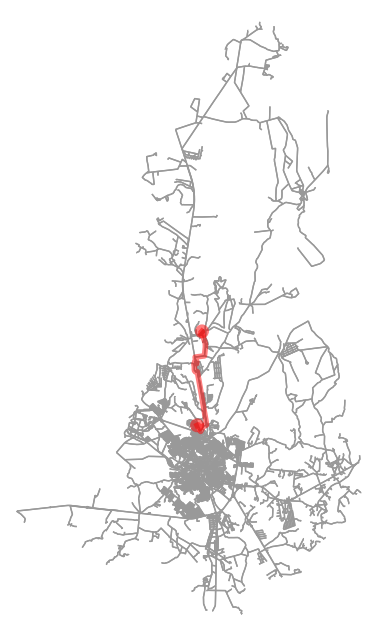

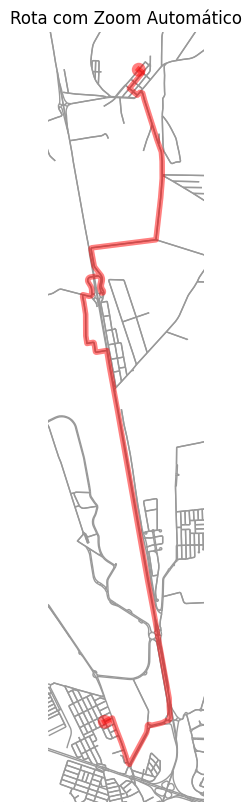

In [24]:
from busca_nao_informada import bfs

rota_bfs = bfs(G.graph, user[0], hcs_validos)

if rota_bfs:
    G.plotar_rota(rota_bfs)
    G.plotar_rota_com_zoom(rota_bfs)

else:
    print("Nenhum hemocentro acess√≠vel foi encontrado.")

A seguir estamos fazendo uma compara√ß√£o entre nossa implementa√ß√£o da BFS e o algoritmo padr√£o da biblioteca networkx, que faz uma busca cuja pondera√ß√£o √© baseada no peso "length", que s√£o as dist√¢ncias em metros mesmos fornecidas pelo OSM. A `rota_curta` √© de fato a rota mais curta em metros, enquanto `rota_bfs` √© a rota mais curta em n√∫mero de arestas.

In [25]:
import networkx as nx

# Calcula rota √≥tima com menor dist√¢ncia em metros (j√° usa weight='length')
rota_curta = G.calcular_rota(user[0], hcs_validos[0])  # usa nx.shortest_path com peso

# Calcula rota BFS (n√£o ponderada, menor n√∫mero de n√≥s)
from busca_nao_informada import bfs
rota_bfs = bfs(G.graph, user[0], hcs_validos)

# Mostra quantos n√≥s foram usados em cada rota
print(f"üî¥ Rota BFS: {len(rota_bfs)} n√≥s")
print(f"üü¢ Rota com menor dist√¢ncia (curta): {len(rota_curta)} n√≥s")

# Comparando as rotas
# Comparar os caminhos ou dist√¢ncias totais percorridas
distancia_curta = G.calcular_distancia(user[0], hcs_validos[0])

distancia_bfs = 0
for i in range(len(rota_bfs) - 1):
    u, v = rota_bfs[i], rota_bfs[i + 1]
    
    # Verifica se a aresta existe no grafo
    if G.graph.has_edge(u, v):
        edge_data = G.graph[u][v]  # Pega os dados da aresta
        # Acessa o comprimento da aresta
        length = edge_data[0].get('length', 0)  # Caso n√£o tenha 'length', assume 0
        distancia_bfs += length
    else:
        print(f"Aresta entre {u} e {v} n√£o encontrada no grafo.")

# Imprime as dist√¢ncias totais das rotas
print(f"üî¥ Dist√¢ncia total BFS: {distancia_bfs} metros")
print(f"üü¢ Dist√¢ncia total da rota curta: {distancia_curta} metros")

# Compara se as rotas s√£o iguais ou diferentes
if rota_bfs == rota_curta:
    print("‚úÖ BFS encontrou a mesma rota da menor dist√¢ncia (coincid√™ncia rara).")
else:
    print("‚ö†Ô∏è BFS encontrou uma rota diferente da mais curta em dist√¢ncia ‚Äî esperado!")

üî¥ Rota BFS: 40 n√≥s
üü¢ Rota com menor dist√¢ncia (curta): 60 n√≥s
üî¥ Dist√¢ncia total BFS: 13857.304110388195 metros
üü¢ Dist√¢ncia total da rota curta: 20307.66501936966 metros
‚ö†Ô∏è BFS encontrou uma rota diferente da mais curta em dist√¢ncia ‚Äî esperado!


Olha que interessante!

O resultado acima mostra que a rota BFS, que encontra a solu√ß√£o que passa por menos arestas (isto √©, d√° menos saltos) n√£o coincide com a solu√ß√£o que √© de fato, mais curta, em termos de dist√¢ncia (em metros mesmo!). Isso era de se esperar e mostra de maneira cabal que essa busca BFS, assim como a DFS (buscas n√£o informadas no geral) n√£o s√£o adequadas para esse problema, que lida com vidas humanas.

### Busca Informada: A* (A-Star)
O algoritmo A* (A-Estrela) de busca em grafos √© um tipo de busca informada, no qual utiliza-se de uma heur√≠stica para avaliar o qu√£o mais pr√≥ximo estamos do destino final. Vale ressaltar que a heur√≠stica √© uma estimativa, que guia a tomada de decis√£o do algoritmo.

O algoritmo funciona da seguinte forma:


$f(n) = g(n) + h(n)$


- **f(n)**: custo total estimado do caminho passando pelo n√≥ `n`
- **g(n)**: custo real do caminho do in√≠cio at√© `n`
- **h(n)**: custo estimado de `n` at√© o destino (heur√≠stica)

Ele percorre o grafo buscando sempre os menores valores de $f(n)$, at√© que encontre um n√≥ final. No caso de mapas ou grafos espaciais (como ruas), a heur√≠stica mais usada √© a **dist√¢ncia euclidiana ou geod√©sica** (haversine) entre os pontos. Esta √© justamente a heur√≠stica que iremos utilizar!

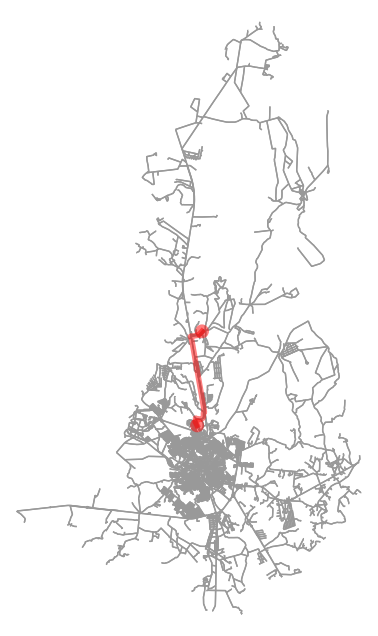

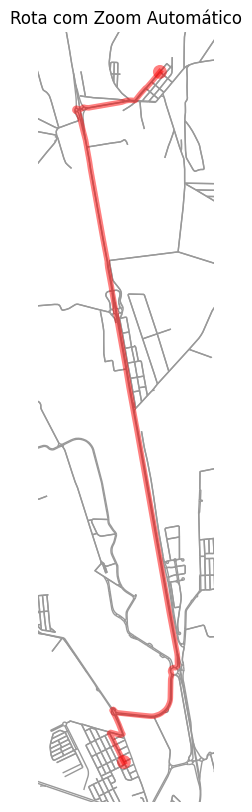

In [26]:
from busca_informada import a_estrela

rota_a_estrela = a_estrela(G.graph, user[0], hcs_validos)

if rota_a_estrela:
    G.plotar_rota(rota_a_estrela)
    G.plotar_rota_com_zoom(rota_a_estrela)

else:
    print("Nenhum hemocentro acess√≠vel foi encontrado.")

In [27]:
# Calcula rota √≥tima com menor dist√¢ncia em metros (j√° usa weight='length')
rota_curta = G.calcular_rota(user[0], hcs_validos[0])  # usa nx.shortest_path com peso 'length'

# Calcula rota A* (tamb√©m usando uma heur√≠stica adequada)
from busca_informada import a_estrela
rota_a_estrela = a_estrela(G.graph, user[0], hcs_validos)

# Mostra quantos n√≥s foram usados em cada rota
print(f"üî¥ Rota A*: {len(rota_a_estrela)} n√≥s")
print(f"üü¢ Rota com menor dist√¢ncia (curta): {len(rota_curta)} n√≥s")

# Comparando as rotas
# Comparar os caminhos ou dist√¢ncias totais percorridas
distancia_curta = G.calcular_distancia(user[0], hcs_validos[1])

# Calcula a dist√¢ncia total da rota A* somando o comprimento de cada aresta
distancia_a_estrela = 0
for i in range(len(rota_a_estrela) - 1):
    u, v = rota_a_estrela[i], rota_a_estrela[i + 1]
    
    # Verifica se a aresta existe no grafo
    if G.graph.has_edge(u, v):
        edge_data = G.graph[u][v]  # Pega os dados da aresta
        # Acessa o comprimento da aresta
        length = edge_data[0].get('length', 0)  # Caso n√£o tenha 'length', assume 0
        distancia_a_estrela += length
    else:
        print(f"Aresta entre {u} e {v} n√£o encontrada no grafo.")

# Imprime as dist√¢ncias totais das rotas
print(f"üî¥ Dist√¢ncia total A*: {distancia_a_estrela} metros")
print(f"üü¢ Dist√¢ncia total da rota curta: {distancia_curta} metros")

# Compara se as dist√¢ncias totais s√£o iguais ou diferentes
if distancia_a_estrela == distancia_curta:
    print("‚úÖ A* encontrou a mesma rota da menor dist√¢ncia (coincid√™ncia rara).")
else:
    print("‚ö†Ô∏è A* encontrou uma rota diferente da mais curta em dist√¢ncia ‚Äî esperado!")

üî¥ Rota A*: 51 n√≥s
üü¢ Rota com menor dist√¢ncia (curta): 60 n√≥s
üî¥ Dist√¢ncia total A*: 11833.826757329109 metros
üü¢ Dist√¢ncia total da rota curta: 17018.98472310349 metros
‚ö†Ô∏è A* encontrou uma rota diferente da mais curta em dist√¢ncia ‚Äî esperado!
